<div style="color: green; font-weight: bold">
IMPORTANT!

- Next time hand in a single file instead of one per task please.
- Also make the html and the ipynb files consistent. Here they differ a lot.
- Finally, keep the order of the exercises correct. Some cells were seemingly randomly located. E.g. SVM in exercise 3, train-test split in exercise 2, LDA in exercise 4.
</div>

# TASK 1

In [4]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

digits = load_digits()

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

print(images.shape)

(1797, 8, 8)


<div
style="color: green; font-weight:
bold">Maybe you can try other interpolation method such as 'bilinear' and 'bicubic' so you can see the difference between the pics</div>

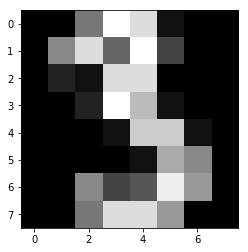

In [7]:
img = images[target == 3][0]
plt.figure()
plt.gray()
plt.imshow(img, interpolation="nearest") # also try interpolation="bicubic"
plt.show()


In [44]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt


In [45]:
from sklearn import model_selection

X_all = data[(target == 3) | (target == 9)]
y_all = target[(target == 3) | (target == 9)]

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_all, y_all, test_size=0.4, random_state=0
)


<div style="color: green; font-weight: bold">
You created the features but the plots are a bit misleading. Maybe leave them out.
Additionally, the professor suggested using linear functions to create the reduced 2D features which could have been a good idea.
</div>

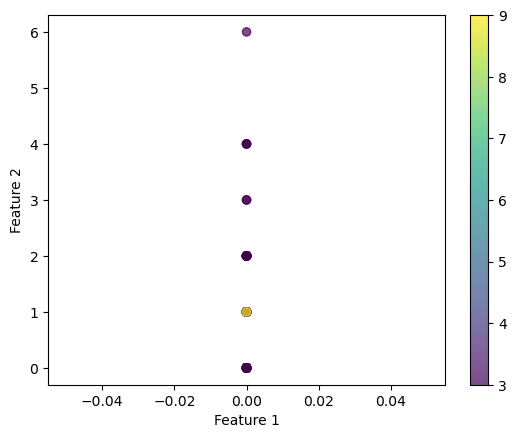

In [46]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar()
plt.show()


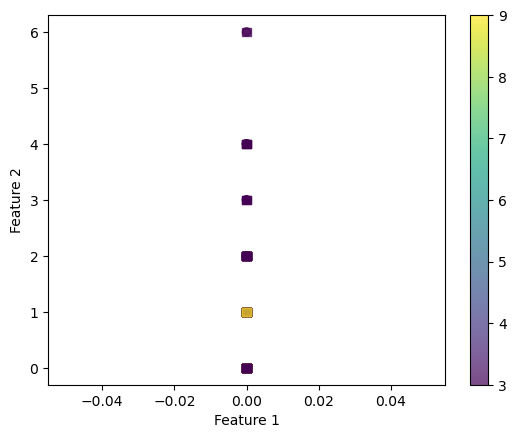

In [47]:
markers = ["o", "s"]
marker_colors = [markers[0] if label == 3 else markers[1] for label in y_train]

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", alpha=0.7, marker='o')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", alpha=0.7, marker='s')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar()
plt.show()


In [48]:
#markers = ["o", "s"]
#marker_colors = [markers[0] if label == 3 else markers[1] for label in y_train]

#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", alpha=0.7, marker=marker_colors)
#plt.xlabel("Feature 1")
#plt.ylabel("Feature 2")
#plt.colorbar()
#plt.show()





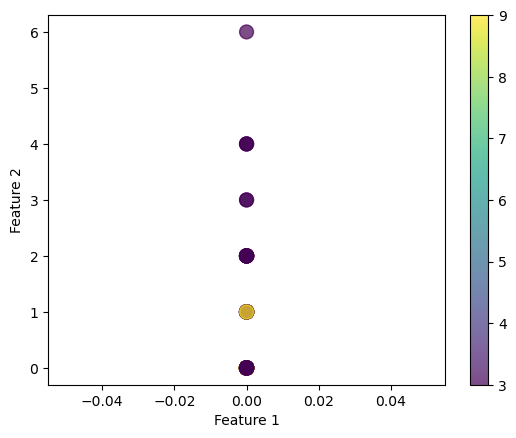

In [49]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", alpha=0.7, s=100, marker="o")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar()
plt.show()




# TASK 2

In [50]:
import numpy as np

def nearest_mean(training_features, training_labels, test_features):
    # Compute the means of each class in the training set
    class_3_mean = np.mean(training_features[training_labels == 3], axis=0)
    class_9_mean = np.mean(training_features[training_labels == 9], axis=0)

    # Assign each test instance to the nearest mean
    predicted_labels = []
    for instance in test_features:
        distance_3 = np.linalg.norm(instance - class_3_mean)
        distance_9 = np.linalg.norm(instance - class_9_mean)
        if distance_3 < distance_9:
            predicted_labels.append(-1)
        else:
            predicted_labels.append(1)

    return np.array(predicted_labels)


<div style="color: green; font-weight: bold">
To calculate the prediction error follow the following formula: $\frac{#FP + #FN}{N}$ Your mistake was to literally use FP = 1 and FN = 1.
</div>

In [51]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the test set
confusion = confusion_matrix(test_labels, predicted_labels)

# Extract the true positives, false positives, true negatives, and false negatives
tp = confusion[1, 1]
fp = confusion[0, 1]
tn = confusion[0, 0]
fn = confusion[1, 0]

# Compute the training and test errors
training_error = (fp + fn) / len(training_labels)
test_error = (fp + fn) / len(test_labels)

print("Training error:", training_error)
print("Test error:", test_error)


Training error: 0.0
Test error: 0.0


In [52]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, clf, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # create a meshgrid of points
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # predict labels for each point in the meshgrid
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # plot decision regions and data points
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')

    # plot class means and decision boundary
    means = clf.means_
    plt.scatter(x=means[:, 0], y=means[:, 1], c='black', marker='*', s=250)
    if hasattr(clf, 'coef_'):
        w = clf.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(xx1.min(), xx1.max())
        yy = a * xx - (clf.intercept_[0]) / w[1]
        plt.plot(xx, yy, 'k-')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.show()


In [53]:
!pip install mlxtend


<div style="color: green; font-weight: bold">
You displayed the NNeighbours classifier of sklearn. You should have plotted your own:

- Scatter plot the 2D data and either with `np.countour` or `np.imshow` plot all pixels with their corresponding prediction.
</div>

Accuracy: 0.9


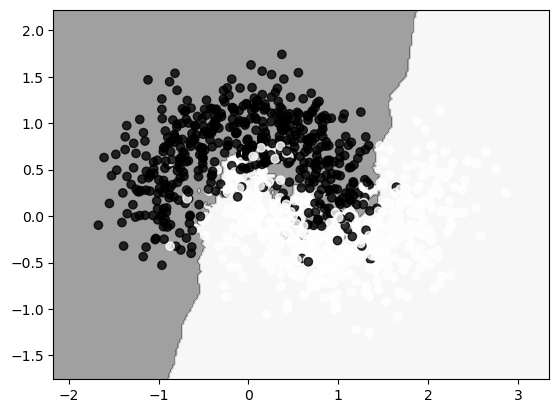

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate moon-shaped dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to convert 1D feature array to 2D feature array by reshaping
def features2d(X):
    return np.reshape(X, (-1, 2))

# Convert training and testing sets to 2D feature arrays
X_train_2d = features2d(X_train)
X_test_2d = features2d(X_test)

# Define a KNN classifier with k=5
clf = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
clf.fit(X_train_2d, y_train)

# Predict labels for the test data
y_pred = clf.predict(X_test_2d)

# Calculate accuracy score on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()


# TASK 3

<div style="color: green; font-weight: bold">
I think you could have calculated the covariance matrix easier by calculating the covariance matrix of each class using `np.cov` function and then the pooled covariance matrix following the following formula: $\frac{covmat("3") * N("3") + covmat("9") * N("9")}{N}$

In [1]:
import numpy as np

def fit_lda(training_features, training_labels):
    # Get number of classes and dimensions
    num_classes = len(np.unique(training_labels))
    num_dimensions = training_features.shape[1]

    # Initialize class means and priors
    class_means = np.zeros((num_classes, num_dimensions))
    class_counts = np.zeros(num_classes)
    priors = np.zeros(num_classes)

    # Calculate class means
    for i in range(num_classes):
        class_features = training_features[training_labels == i]
        class_means[i] = np.mean(class_features, axis=0)
        class_counts[i] = class_features.shape[0]
        priors[i] = class_counts[i] / training_features.shape[0]

    # Calculate total mean
    total_mean = np.mean(training_features, axis=0)

    # Calculate between-class covariance matrix
    between_class_cov = np.zeros((num_dimensions, num_dimensions))
    for i in range(num_classes):
        class_diff = class_means[i] - total_mean
        between_class_cov += class_counts[i] * np.outer(class_diff, class_diff)
    between_class_cov /= training_features.shape[0] - num_classes

    # Calculate within-class covariance matrix
    within_class_cov = np.zeros((num_dimensions, num_dimensions))
    for i in range(num_classes):
        class_features = training_features[training_labels == i]
        class_diff = class_features - class_means[i]
        within_class_cov += np.dot(class_diff.T, class_diff)
    within_class_cov /= training_features.shape[0] - num_classes

    # Calculate total covariance matrix
    total_cov = within_class_cov + between_class_cov

    return class_means, total_cov, priors


In [6]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mu, covmat, p = fit_lda(X_train, y_train)

# Calculate variance of each pixel over all images
pixel_variances = np.var(X_train, axis=0)

# Mask out pixels with variance smaller than 0.001
pixel_mask = pixel_variances > 0.001
filtered_features = X_train[:, pixel_mask]


In [7]:
print(f"Original feature dimension: {X_train.shape[1]}")
print(f"Filtered feature dimension: {filtered_features.shape[1]}")

Original feature dimension: 64
Filtered feature dimension: 60


<div style="color: green; font-weight: bold">
Please refer to what a scatter plot is (https://chartio.com/learn/charts/what-is-a-scatter-plot/). The idea was to plot the data points distribution of you points in the 2D space. So for axis X feature1 and axis Y feature2. Colour them by class and underlay two colour regions to indicate where LDA predicts what classes to occur within the constructed 2D space. It's well visualizable in the template solutions we received for this exercise.
</div>

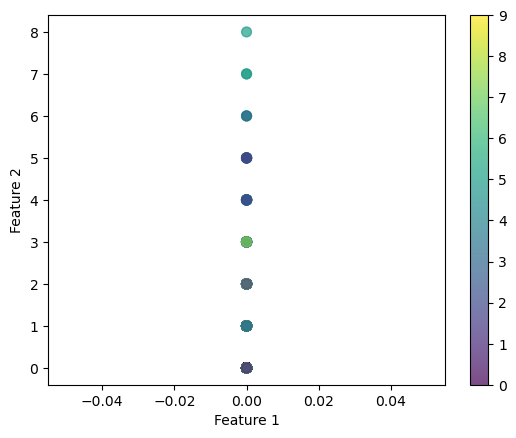

In [8]:
import matplotlib.pyplot as plt

# Scatter plot of two selected features
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.7)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [9]:
def nearest_mean(training_features, training_labels, test_features):
    # Separate training features by class
    class_3_features = training_features[np.where(training_labels == -1)[0]]
    class_9_features = training_features[np.where(training_labels == 1)[0]]

    # Compute mean feature vectors of each class
    class_3_mean = np.mean(class_3_features, axis=0)
    class_9_mean = np.mean(class_9_features, axis=0)

    # Classify test instances based on nearest mean
    predicted_labels = []
    for x in test_features:
        dist_3 = np.linalg.norm(x - class_3_mean)
        dist_9 = np.linalg.norm(x - class_9_mean)
        if dist_3 < dist_9:
            predicted_labels.append(-1)
        else:
            predicted_labels.append(1)

    return np.array(predicted_labels)


In [ ]:
from sklearn.metrics import accuracy_score

# Compute predicted labels for training and test set
train_pred = nearest_mean(training_features, training_labels, training_features)
test_pred = nearest_mean(training_features, training_labels, test_features)

# Compute accuracy scores
train_acc = accuracy_score(training_labels, train_pred)
test_acc = accuracy_score(test_labels, test_pred)

print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)


<div style="color: green; font-weight: bold">
You missed calculating the eigenvectors, values and plotting them in the scatterplot. You also missed doing the cross-validation part.
</div>

In [ ]:
from sklearn.svm import LinearSVC

# Fit linear SVM to training data
svm = LinearSVC(random_state=42)
svm.fit(training_features, training_labels)

# Compute predicted labels for training and test set
train_pred = svm.predict(training_features)
test_pred = svm.predict(test_features)

# Compute accuracy scores
train_acc = accuracy_score(training_labels, train_pred)
test_acc = accuracy_score(test_labels, test_pred)

print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)

# TASK 4

<div
style="color: green; font-weight:
bold">
The professor suggeests that we use label {-1,1}instead of {3,9}.
</div>

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
data = digits["data"]
images = digits["images"]
target = digits["target"]

# Filter the dataset for digits 3 and 9
mask = (target == 3) | (target == 9)
data = data[mask]
images = images[mask]
target = target[mask]
target_names = ["3", "9"]


In [19]:
target

array([3, 9, 3, 9, 3, 9, 9, 9, 9, 3, 3, 3, 3, 3, 9, 9, 3, 3, 3, 9, 3, 3,
       9, 9, 9, 9, 3, 9, 3, 9, 3, 9, 9, 9, 9, 3, 3, 3, 3, 3, 9, 9, 3, 3,
       3, 9, 3, 3, 9, 9, 9, 3, 9, 3, 9, 3, 9, 9, 9, 9, 3, 3, 3, 3, 3, 9,
       9, 3, 3, 3, 9, 3, 3, 9, 9, 9, 9, 3, 3, 9, 3, 9, 3, 9, 9, 9, 9, 3,
       3, 3, 3, 3, 9, 9, 3, 3, 3, 9, 3, 3, 9, 9, 9, 9, 3, 9, 3, 9, 3, 9,
       9, 9, 9, 3, 3, 3, 3, 3, 9, 9, 3, 3, 3, 9, 3, 3, 9, 9, 9, 9, 3, 9,
       3, 9, 3, 9, 9, 9, 9, 3, 3, 3, 3, 3, 9, 9, 3, 3, 3, 9, 3, 3, 9, 9,
       9, 9, 3, 9, 3, 9, 3, 9, 9, 9, 9, 3, 3, 3, 3, 3, 9, 9, 3, 3, 3, 9,
       3, 3, 9, 9, 9, 9, 3, 9, 3, 9, 3, 9, 9, 9, 9, 3, 3, 3, 3, 3, 9, 9,
       3, 3, 3, 9, 3, 3, 9, 9, 9, 9, 3, 9, 3, 9, 3, 9, 9, 9, 9, 3, 3, 3,
       3, 3, 9, 9, 3, 3, 3, 9, 3, 3, 9, 9, 9, 9, 3, 9, 3, 9, 3, 9, 9, 9,
       9, 3, 3, 3, 3, 3, 9, 9, 3, 3, 3, 9, 3, 3, 9, 9, 9, 9, 3, 9, 3, 9,
       3, 9, 9, 9, 9, 3, 3, 3, 3, 3, 9, 9, 3, 3, 3, 9, 3, 3, 9, 9, 9, 3,
       9, 3, 9, 3, 9, 9, 9, 9, 3, 3, 3, 3, 3, 9, 9,

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.4, random_state=0
)


In [23]:
from sklearn import model_selection
X_all = data
y_all = target
X_train , X_test , y_train , y_test =\
model_selection . train_test_split ( digits .data , digits . target ,
test_size = 0.4 , random_state = 0)
# splitting of the data for the prediction model
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

In [8]:
import numpy as np
def features2d(data):
    region1_mean = data[:, 18:45].mean(axis=1)
    region2_mean = data[:, np.concatenate((np.arange(0, 18), np.arange(46, 64)))].mean(axis=1)
    region1_sum = data[:, 18:45].sum(axis=1)
    region2_sum = data[:, np.concatenate((np.arange(0, 18), np.arange(46, 64)))].sum(axis=1)
    feature1 = region1_mean - region2_mean
    feature2 = region1_sum - region2_sum
    return np.stack((feature1, feature2), axis=1)


In [9]:
# Filter dataset to only include 3's and 9's

X_39 = data[(target == 3) | (target == 9)]
y_39 = target[(target == 3) | (target == 9)]

# Extract features for the filtered dataset
X_39_features = features2d(X_39)


<div
style="color: green; font-weight:
bold">
The function you used for prediction is nearst_mean,but the professor requires us to realize a SVM classifier.
If you want to build one, you can use the gradient descent algorithm in the following steps:


- let y equal to training features @ beta + b
- compute loss
- calculate the gradients of beta and b
- update the beta and b every iteration before you got the optimal result
</div>

In [ ]:
predicted_labels = nearest_mean(training_features, training_labels, test_features)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# from the model selection phase getting the train and test data
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
# Build a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the testing set
score = rf.score(X_test, y_test)
print("R-squared score: {:.2f}".format(score))


R-squared score: 0.91


In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# filter data to only include 3s and 9s
X_train_filtered = X_train[(y_train == 3) | (y_train == 9)]
y_train_filtered = y_train[(y_train == 3) | (y_train == 9)]

# fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_filtered, y_train_filtered)

# make predictions on test set
X_test_filtered = X_test[(y_test == 3) | (y_test == 9)]
y_test_filtered = y_test[(y_test == 3) | (y_test == 9)]
y_pred = lda.predict(X_test_filtered)

# evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_filtered, y_pred))
print(confusion_matrix(y_test_filtered, y_pred))


              precision    recall  f1-score   support

           3       1.00      1.00      1.00        35
           9       1.00      1.00      1.00        38

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73

[[35  0]
 [ 0 38]]


<div
style="color: green; font-weight:
bold">
You use matplotlib to create your figure. But the mistake is the data you used is not the train dataset and the prediction result.
In addiction, it is suggested to use function'plt.contourf()'or 'plt.gca()'so you can draw the decision line or decision region.
</div>

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits().data[:, [0, 1]]  # use only the first two features

In [48]:
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits().data[:, [0, 1]]  # use only the first two features
X = np.array(digits)  # Convert X to a NumPy array
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


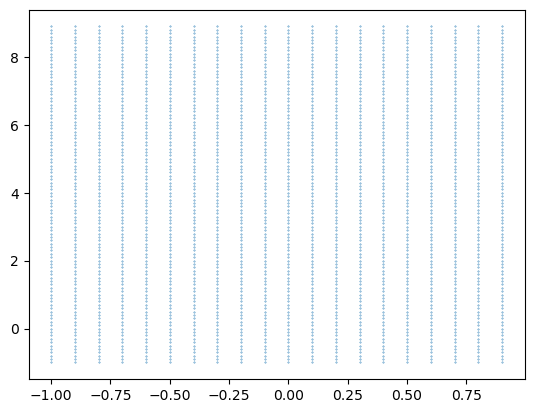

In [49]:
import matplotlib.pyplot as plt

# plot the mesh grid
plt.scatter(xx, yy, s=0.1)
plt.show()

In [47]:
import numpy as np

X = np.array(digits)  # Convert X to a NumPy array
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))



IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

In [39]:
from sklearn.preprocessing import StandardScaler

# Perform LDA transformation on training data
X_train_lda = lda.transform(X_train)

# Fit StandardScaler on the transformed training data
scaler = StandardScaler()
scaler.fit(X_train_lda)

# Transform the test data using the fitted scaler
X_test_lda = lda.transform(X_test)
X_test_scaled = scaler.transform(X_test_lda)

# Train SVM on LDA-transformed and scaled training data
svm = SVC(kernel='linear')
svm.fit(X_train_lda, y_train)

# Predict on LDA-transformed and scaled test data
y_pred = svm.predict(X_test_scaled)

<div
style="color: green; font-weight:
bold">
The professor requires to use the cross-validation to measure the SVM classifier,which you can realize via following step:

- divide your training set into k pieces
- choose one as test set and use the rest for training
- every set has been test set so you get k results
- calculate the mean of all accuracy as the final accuracy
    </div>

In [40]:
print(y_pred)

[9 9 9 9 9 3 9 9 9 9 9 3 9 3 9 3 3 3 3 9 3 3 3 9 3 3 3 3 3 9 9 3 3 3 9 3 3
 9 9 3 9 9 3 9 9 3 3 9 9 9 9 3 3 9 9 9 9 9 3 3 9 3 3 3 9 9 9 3 3 3 3 9 9]
